<a href="https://colab.research.google.com/github/jcdumlao14/Data-Science-Internship-Program-SKS/blob/main/Task_3_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Customer Segmentation
## Description:
*Segment customers based on tenure, monthly charges, and contract type. Analyze churn rates within these segments. Identify high-value customers who are at risk of churning and might need special attention.*
## Skills :
- Segmentation techniques
- Understanding of customer behavior
- Churn analysis within segments
- Identifying high-value customers.


# 1. Importing Tools (Libraries):

- `import pandas as pd`: Pandas is like a spreadsheet program for Python. It lets you work with data in tables (like the customer information). pd is just a short name we give it so we don't have to type "pandas" every time.
- `import numpy as np`: NumPy is for doing math and working with numbers efficiently. np is its short name.
- `import matplotlib.pyplot as plt`: Matplotlib is used for creating graphs and charts. plt is its short name.
- `import seaborn as sns`: Seaborn is another library for making statistical graphs, and it's built on top of Matplotlib. It makes the graphs look nicer. sns is its short name.
- `from sklearn.cluster import KMeans`: This imports the "KMeans" clustering algorithm from a library called scikit-learn (sklearn). KMeans is the technique used to group customers.
- `from sklearn.preprocessing import StandardScaler`: This imports StandardScaler from scikit-learn (sklearn). StandardScaler is used to standardize the features before applying the algorithm.
- `from sklearn.metrics import silhouette_score`: This imports a way to measure how well the clustering worked (silhouette score).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Loading the Data:

- `df = pd.read_csv("/content/Telco_Customer_Churn_Dataset (3).csv")`: This reads the customer data from a file named "Telco_Customer_Churn_Dataset (3).csv" and stores it in a table called df (short for "DataFrame").

- `df.head()`: This shows the first few rows of the table, so you can see what the data looks like.

- `df.info()`: This gives you information about the table, like what types of data are in each column (numbers, text, etc.) and if there are any missing values.

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3. Cleaning and Preparing the Data (Preprocessing):

- `df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')`: The total charges column needs to be converted to numeric type. If it cannot be convered, they are replaced by 'NaN'.

- `df['TotalCharges'] = df['TotalCharges'].fillna(0)`: This fills any missing total charge values with 0.

- Binary Columns Conversion:

  - `binary_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']`: This makes a list of columns that only have "Yes" or "No" values (or Male, Female).

  - `for col in binary_cols: df[col] = df[col].map({'Yes': 1, 'No': 0})`: This converts "Yes" to 1 and "No" to 0 in those columns, which is easier for the computer to work with. Same goes for gender below.

  - df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

- One-Hot Encoding:

  - `df = pd.get_dummies(df, columns=['Contract', 'InternetService'], drop_first=True)`: Some columns have categories like "Month-to-month contract," "One-year contract," etc. This converts these categories into separate columns of 0s and 1s. It makes it clearer for the clustering model to understand. drop_first=True avoids having redundant information (it removes one of the categories). It also handles 'InternetService'.


In [ ]:
# Data Cleaning and Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


# 4. Selecting Features:

- `segmentation_features = ['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No']`: This chooses which columns from the data table will be used to group the customers. These are called "features." In this case, it's things like:

  - `tenure`: How long they've been a customer.
  - `MonthlyCharges`: How much they pay each month.
  - `Contract_One year, Contract_Two year`: Whether they have a one or two year contract.
  - `InternetService_Fiber optic, InternetService_No`: Whether they use fiber optic internet or don't have internet service.

- Handling Missing Features:

  - `missing_cols = set(segmentation_features) - set(df.columns)`
  - `for c in missing_cols: df[c] = 0`: This makes sure if any of the features are missing (for some reason), it creates those columns and fills them with 0s.

- `X = df[segmentation_features]`: This creates a new table called X that only contains the selected features.


In [ ]:
# One-Hot Encode Contract and InternetService
df = pd.get_dummies(df, columns=['Contract', 'InternetService'], drop_first=True)

# Feature Selection and Scaling
segmentation_features = ['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No']

# Handle missing columns more gracefully
missing_cols = set(segmentation_features) - set(df.columns)
for c in missing_cols:
    df[c] = 0

X = df[segmentation_features]

# 5.Scaling the Features:

  - `scaler = StandardScaler()`: Creates a scaler object to scale the data.

  - `X_scaled = scaler.fit_transform(X)`: This makes sure all the features are on the same scale (have similar ranges of values). This is important because KMeans is affected by the scale of the data. This prevents features with larger values from dominating the clustering.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Finding the Best Number of Clusters:

- `Silhouette Score`: The code uses a "silhouette score" to help decide how many clusters to use. The silhouette score measures how similar a customer is to its own cluster compared to other clusters. Higher scores are better.
- The code loops through different numbers of clusters (2 to 6). For each number, it:

   - `kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')`: Creates a KMeans clustering model with that number of clusters.

   - `cluster_labels = kmeans.fit_predict(X_scaled)`: Runs the KMeans algorithm to group the customers into clusters. fit_predict both trains the model and predicts which cluster each customer belongs to.

  - `silhouette_avg = silhouette_score(X_scaled, cluster_labels)`: Calculates the silhouette score.

  - `silhouette_scores.append(silhouette_avg)`: Saves the score to be compared later.

  - `print(...)`: Prints the score for each number of clusters.

- Plotting the Scores:

  - `plt.plot(range(2, 7), silhouette_scores, marker='o')`: This creates a graph that shows the silhouette scores for each number of clusters.
  - The rest of the plotting code just makes the graph look nice with titles and labels.

For n_clusters = 2, the average silhouette_score is : 0.32955916929442586
For n_clusters = 3, the average silhouette_score is : 0.380738802833623
For n_clusters = 4, the average silhouette_score is : 0.42361084668681515
For n_clusters = 5, the average silhouette_score is : 0.45464314439812215
For n_clusters = 6, the average silhouette_score is : 0.5164205077697585


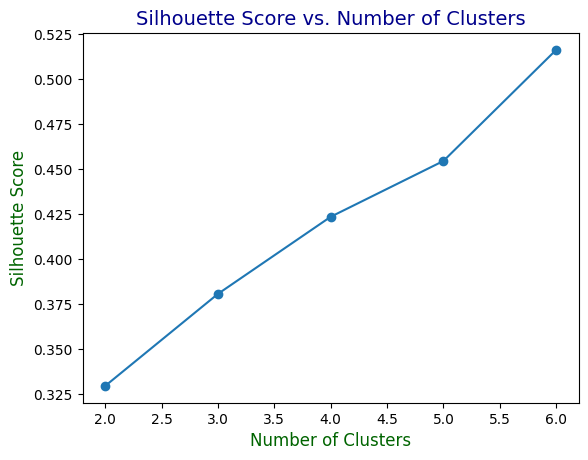

In [ ]:
# K-Means Clustering with Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 'auto') #explicitly declare n_init
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters', fontsize=14, color='darkblue')
plt.xlabel('Number of Clusters', fontsize=12, color='darkgreen')
plt.ylabel('Silhouette Score', fontsize=12, color='darkgreen')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- `optimal_clusters = 3`: Based on the graph, someone manually chooses the number of clusters that looks best. Here, it's set to 3. This is where you'd look at the silhouette plot and choose the number of clusters with the highest silhouette score.

In [ ]:
optimal_clusters = 3  # Adjust based on the Silhouette Score plot

# 7. Running the Clustering with the Chosen Number of Clusters:

- `kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')`: Creates the KMeans model again, this time with the chosen number of clusters.
- `df['cluster'] = kmeans.fit_predict(X_scaled)`: Runs the clustering again and adds a new column to the original data table called "cluster." This column shows which cluster each customer belongs to.
- `print(df['cluster'].value_counts())`: This counts how many customers are in each cluster.

In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init = 'auto') #explicitly declare n_init
df['cluster'] = kmeans.fit_predict(X_scaled)

df['cluster'].value_counts()

,count
cluster,
2,2681
1,2676
0,1686


# 8. Churn Analysis within Segments:

- `cluster_churn_rate = df.groupby('cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0)`: This calculates the churn rate (percentage of customers who left) for each cluster. It is calculated by grouping by cluster, counting churn rate within each cluster, converting into percentages and filling missing data with 0.
- `print("Churn Rate by Cluster:\n", cluster_churn_rate)`: Prints the churn rates.
- `Visualizing Churn Rates`: The rest of the code creates a bar graph to show the churn rate for each cluster. The bars are colored differently for "churned" and "not churned" customers. Annotations are added to make it more interpretable.

Churn Rate by Cluster:
 Churn           0         1
cluster                    
0        0.971530  0.028470
1        0.526906  0.473094
2        0.792988  0.207012


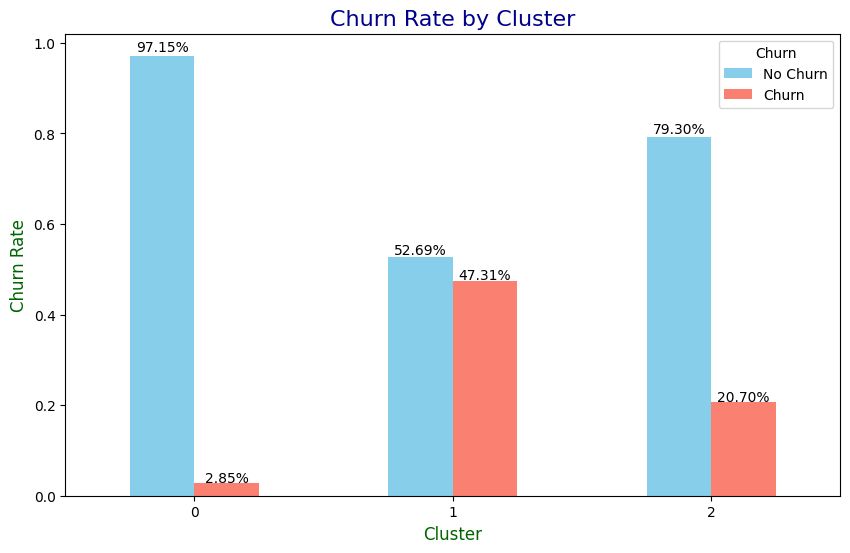

In [ ]:
# Churn Analysis within Segments
cluster_churn_rate = df.groupby('cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print("Churn Rate by Cluster:\n", cluster_churn_rate)

# Visualize churn rate by cluster with enhancements
ax = cluster_churn_rate.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])  # Set figure size and colors
plt.title('Churn Rate by Cluster', fontsize=16, color='darkblue')
plt.xlabel('Cluster', fontsize=12, color='darkgreen')
plt.ylabel('Churn Rate', fontsize=12, color='darkgreen')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add value annotations on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center', fontsize=10, color='black')  # Added percentage formatting

plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=10)
plt.show()

# 9. Identifying High-Value Customers at Risk:

- `high_value_threshold_monthly = df['MonthlyCharges'].quantile(0.75)`: Determines a threshold (cutoff) for what's considered a "high" monthly charge. It uses the 75th percentile (meaning 75% of customers pay less than this amount).
- `high_value_threshold_total = df['TotalCharges'].quantile(0.75)`: Does the same thing for total charges.
- `high_value_customers = df[(df['MonthlyCharges'] >= high_value_threshold_monthly) & (df['TotalCharges'] >= high_value_threshold_total)]`: Creates a new table containing only the customers who have high monthly charges and high total charges.
- `high_value_churn_risk = high_value_customers.groupby('cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0)`: Calculates the churn rate for high-value customers in each cluster.

- `print(...)`: Prints the results.

- Visualizing High-Value Churn: Again, creates a bar graph to visualize the churn risk among high-value customers in each cluster. Annotations are added to make it more interpretable.

- Identifying at Risk Customers:

  - `highest_churn_cluster = high_value_churn_risk.index[high_value_churn_risk[1].argmax()]`: Finds the cluster with the highest churn rate among high-value customers.
  - `at_risk_customers = high_value_customers[(high_value_customers['cluster'] == highest_churn_cluster) & (high_value_customers['Churn'] == 1)]`: Filters to find high-value customers in that cluster who have already churned.
  - `print(...)`: Prints a list of these at-risk customers, including their ID, monthly charges, total charges, and tenure.


High-Value Customer Churn Risk by Cluster:
 Churn           0         1
cluster                    
0        0.928241  0.071759
1        0.733728  0.266272
2        1.000000  0.000000


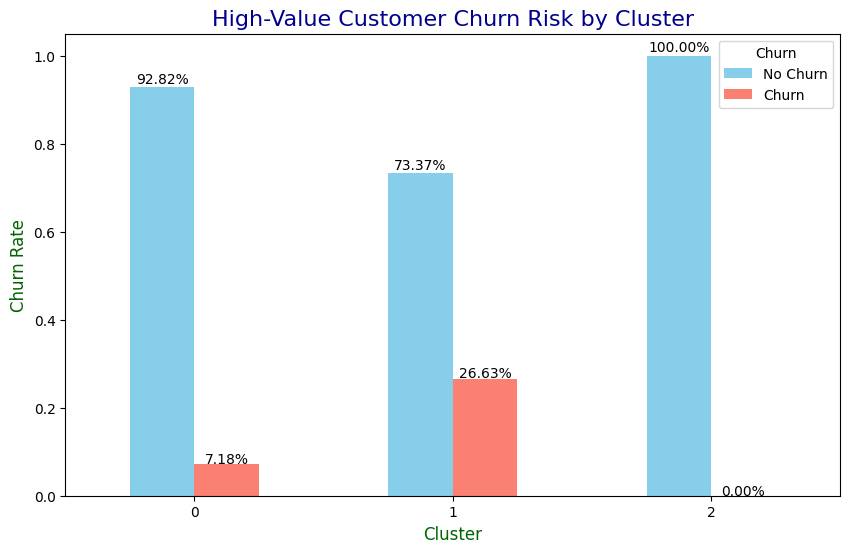


Example High-Value Customers at Risk (Cluster 1):

      customerID  MonthlyCharges  TotalCharges  tenure
13    0280-XJGEX          103.70       5036.30      49
26    6467-CHFZW           99.35       4749.15      47
110   0486-HECZI           96.75       5238.90      55
173   0691-JVSYA           94.85       5000.20      53
276   4484-GLZOU          105.05       5624.85      52
...          ...             ...           ...     ...
6914  7142-HVGBG          103.00       4414.30      43
6952  6394-MFYNG          107.40       5121.30      48
6972  6664-FPDAC          111.95       6418.90      56
7006  0093-XWZFY          104.50       4036.85      40
7034  0639-TSIQW          102.95       6886.25      67

[180 rows x 4 columns]


In [ ]:
# Identifying High-Value Customers at Risk of Churn
high_value_threshold_monthly = df['MonthlyCharges'].quantile(0.75)
high_value_threshold_total = df['TotalCharges'].quantile(0.75)

high_value_customers = df[(df['MonthlyCharges'] >= high_value_threshold_monthly) & (df['TotalCharges'] >= high_value_threshold_total)]

high_value_churn_risk = high_value_customers.groupby('cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print("\nHigh-Value Customer Churn Risk by Cluster:\n", high_value_churn_risk)

# Visualize high value churn risk with enhancements
ax = high_value_churn_risk.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])  # Set figure size and colors
plt.title('High-Value Customer Churn Risk by Cluster', fontsize=16, color='darkblue')
plt.xlabel('Cluster', fontsize=12, color='darkgreen')
plt.ylabel('Churn Rate', fontsize=12, color='darkgreen')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add value annotations on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center', fontsize=10, color='black')  # Added percentage formatting

plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=10)
plt.show()

highest_churn_cluster = high_value_churn_risk.index[high_value_churn_risk[1].argmax()]
at_risk_customers = high_value_customers[(high_value_customers['cluster'] == highest_churn_cluster) & (high_value_customers['Churn'] == 1)]

print("\nExample High-Value Customers at Risk (Cluster {}):\n".format(highest_churn_cluster))

if not at_risk_customers.empty:
    print(at_risk_customers[['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure']])
else:
    print("No high-value churners found in that cluster")

# 10. Understanding Customer Behavior
- **Cluster Profiles**: This section analyzes each cluster to understand what their main characteristcs are in order to better address each specific needs.
-**Deeper Dive into High-Churn Clusters**: Now that the clusters with highest churn are identified, they will be further analyzed in order to find specific patterns, service usage or demographical factors that may be contributing to high churn.
- **Identifying Key Drivers of Churn within Each Segment**: This section attempts to identify what is the main factor for churn within each specific cluster.
- **Customer Journey Analysis**: Discusses other important metrics that should be accounted for, such as first touchpoint, customer service interactions, etc.

In [ ]:
# Cluster Profiles: Detailed Analysis of Each Cluster
print("\n--- Cluster Profiles ---")
cluster_profiles = df.groupby('cluster').agg({
    'tenure': 'mean',
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'Partner': 'mean',  # Proportion with partner
    'Dependents': 'mean', # Proportion with dependents
    'SeniorCitizen': 'mean', # Proportion of senior citizens
    'Contract_One year': 'mean', #Proportion with one year contract
    'Contract_Two year': 'mean', #Proportion with two year contract
    'InternetService_Fiber optic': 'mean', # Proportion using fiber optic
    'InternetService_No': 'mean',# Proportion without internet
    'Churn': 'mean'  # Churn Rate
})
print(cluster_profiles)


--- Cluster Profiles ---
            tenure  MonthlyCharges  TotalCharges   Partner  Dependents  \
cluster                                                                  
0        56.877224       60.528974   3709.443446  0.705813    0.466785   
1        27.735800       89.453382   2623.732791  0.442078    0.189836   
2        21.586721       42.777881   1037.276427  0.383812    0.303991   

         SeniorCitizen  Contract_One year  Contract_Two year  \
cluster                                                        
0             0.085409           0.000000           1.000000   
1             0.284380           0.201420           0.003363   
2             0.088400           0.348377           0.000000   

         InternetService_Fiber optic  InternetService_No     Churn  
cluster                                                             
0                            0.24911             0.37841  0.028470  
1                            1.00000             0.00000  0.473094  
2     


--- Detailed Analysis of High-Churn Cluster(s) ---

--- Analysis for Cluster 1 ---

Demographics & Relationships:
  Average Senior Citizen: 0.28
  Proportion with Partner: 0.44
  Proportion with Dependents: 0.19

Service Usage:
  Average Monthly Charges: $89.45
  Average Tenure: 27.74 months
  Proportion Fiber Optic: 1.00
  Proportion No Internet: 0.00

Contract Preferences:
  Proportion One-Year Contract: 0.20
  Proportion Two-Year Contract: 0.00

Payment Method Preference:
PaymentMethod
Electronic check             0.563154
Bank transfer (automatic)    0.181614
Credit card (automatic)      0.166293
Mailed check                 0.088939
Name: proportion, dtype: float64
Churn Rate: 0.47


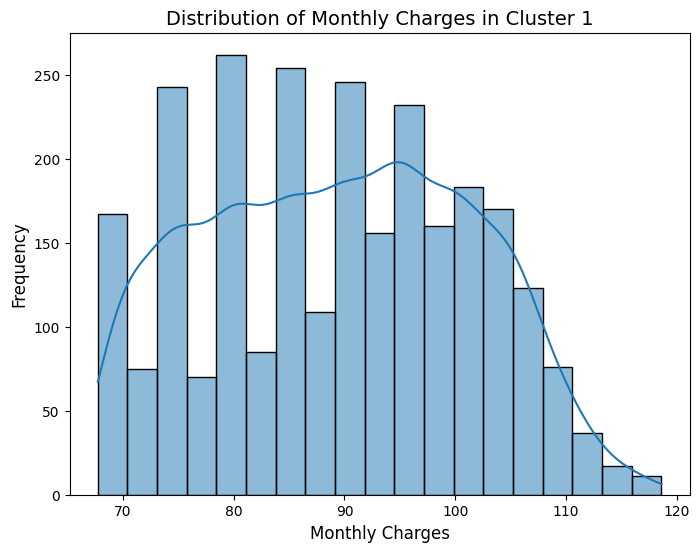

In [ ]:
# Deeper Dive into High-Churn Clusters
print("\n--- Detailed Analysis of High-Churn Cluster(s) ---")

# Identify the cluster(s) with the highest churn rate.  Handling potential ties.
highest_churn_clusters = cluster_churn_rate[cluster_churn_rate[1] == cluster_churn_rate[1].max()].index.tolist()

for cluster_id in highest_churn_clusters:
    print(f"\n--- Analysis for Cluster {cluster_id} ---")

    # Demographics and Relationship Status
    print("\nDemographics & Relationships:")
    print(f"  Average Senior Citizen: {df[df['cluster'] == cluster_id]['SeniorCitizen'].mean():.2f}")
    print(f"  Proportion with Partner: {df[df['cluster'] == cluster_id]['Partner'].mean():.2f}")
    print(f"  Proportion with Dependents: {df[df['cluster'] == cluster_id]['Dependents'].mean():.2f}")

    # Service Usage Patterns
    print("\nService Usage:")
    print(f"  Average Monthly Charges: ${df[df['cluster'] == cluster_id]['MonthlyCharges'].mean():.2f}")
    print(f"  Average Tenure: {df[df['cluster'] == cluster_id]['tenure'].mean():.2f} months")
    print(f"  Proportion Fiber Optic: {df[df['cluster'] == cluster_id]['InternetService_Fiber optic'].mean():.2f}")
    print(f"  Proportion No Internet: {df[df['cluster'] == cluster_id]['InternetService_No'].mean():.2f}")

    # Contract Preferences
    print("\nContract Preferences:")
    print(f"  Proportion One-Year Contract: {df[df['cluster'] == cluster_id]['Contract_One year'].mean():.2f}")
    print(f"  Proportion Two-Year Contract: {df[df['cluster'] == cluster_id]['Contract_Two year'].mean():.2f}")

    #Payment Type
    print("\nPayment Method Preference:")
    payment_counts = df[df['cluster'] == cluster_id]['PaymentMethod'].value_counts(normalize=True)
    print(payment_counts)

    #churn Rate
    print(f"Churn Rate: {df[df['cluster'] == cluster_id]['Churn'].mean():.2f}")

    #Visualize Service Usage Patterns in the Cluster (Example)
    plt.figure(figsize=(8, 6))
    sns.histplot(df[df['cluster'] == cluster_id]['MonthlyCharges'], kde=True) #Histogram with KDE
    plt.title(f"Distribution of Monthly Charges in Cluster {cluster_id}", fontsize=14)
    plt.xlabel("Monthly Charges", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()


In [ ]:
# Identifying Key Drivers of Churn within Each Segment
# (This would ideally involve building a classification model, but for this example, we'll look at correlations)
print("\n--- Churn Correlation Analysis within Segments ---")
for cluster_id in range(optimal_clusters):  # Iterate through each cluster
    print(f"\n--- Correlation Analysis for Cluster {cluster_id} ---")
    cluster_data = df[df['cluster'] == cluster_id]

    # Select only numeric columns for correlation calculation
    numeric_columns = cluster_data.select_dtypes(include=np.number).columns
    if 'Churn' in numeric_columns:
        correlation_matrix = cluster_data[numeric_columns].corr()['Churn'].sort_values(ascending=False)
        print(correlation_matrix)
    else:
        print("Churn column not found in numeric columns for this cluster.")


--- Churn Correlation Analysis within Segments ---

--- Correlation Analysis for Cluster 0 ---
Churn               1.000000
MonthlyCharges      0.129864
TotalCharges        0.114097
PaperlessBilling    0.077414
StreamingTV         0.056121
tenure              0.041451
StreamingMovies     0.031578
SeniorCitizen       0.024249
PhoneService        0.019217
gender              0.013453
DeviceProtection    0.008787
Partner            -0.022532
Dependents         -0.031494
OnlineBackup       -0.045591
TechSupport        -0.050261
OnlineSecurity     -0.089864
cluster                  NaN
Name: Churn, dtype: float64

--- Correlation Analysis for Cluster 1 ---
Churn               1.000000
PaperlessBilling    0.092347
SeniorCitizen       0.051392
StreamingTV        -0.008539
StreamingMovies    -0.018873
gender             -0.021280
Dependents         -0.094151
Partner            -0.115549
DeviceProtection   -0.128375
MonthlyCharges     -0.138533
OnlineBackup       -0.159720
TechSupport        -

# Customer Journey Analysis (Conceptual - requires more data)

To fully understand customer behavior, we'd ideally analyze the customer journey:
- First touchpoint (how did they find us?)
- Initial service selection"
- Upgrades/downgrades over time"
- Customer service interactions"
- Reasons for churn (if available)"

This requires tracking customer interactions across different channels."